# Load Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
# compare the accuracy of models with or without scaling the data
def compare(accuracy_scaled,accuracy):
    if accuracy_scaled > accuracy:
        return '>'
    else: return '<'

# to find which variable has the highest cof under each Severity/class
def find_max(df):
    max_table = {}
    for i in range(len(classes)):
        temp = []
        r1 = df.iloc[i,:].apply(np.abs)
        r1_argmax = r1[r1 == r1.max()].index
        temp.append(r1_argmax[0])
        temp.append(r1[r1_argmax[0]])
        max_table[classes[i]] = temp
    return pd.DataFrame(max_table, index = ['variable','cof'])


In [3]:
# import data
df = pd.read_csv('data/US_Accidents_Dec19.csv')

In [3]:
# see the distirbution
df["Severity"].value_counts()

2    1993410
3     887620
4      92337
1        968
Name: Severity, dtype: int64

In [4]:
df.columns

Index(['ID', 'Source', 'TMC', 'Severity', 'Start_Time', 'End_Time',
       'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)',
       'Description', 'Number', 'Street', 'Side', 'City', 'County', 'State',
       'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp',
       'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

# Milesone_1

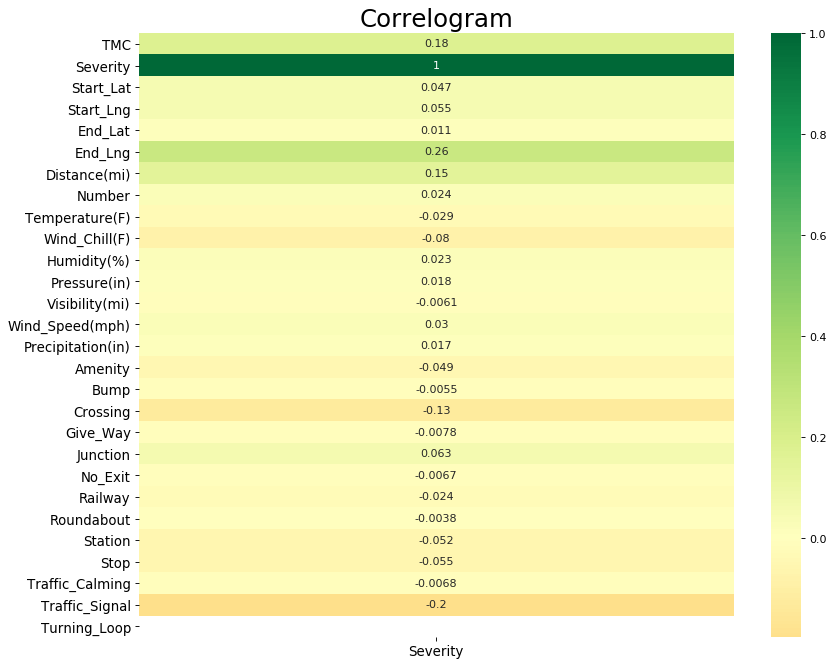

In [8]:
import seaborn as sns
c = df.corr()
c1 = c.iloc[:,1:2]

# Plot corr of variables
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(c1, xticklabels=c1.columns, yticklabels=c1.index, cmap='RdYlGn', center=0, annot=True)

# Decorations
plt.title('Correlogram', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Manually select variables based on the heatmap above and our understanding

In [79]:
# seleced variables
a = ['Severity','Distance(mi)', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
'Wind_Speed(mph)', 'Precipitation(in)', 'Amenity', 'Crossing', 'Junction', 'Railway',  'Traffic_Signal'] # All columns
sv = ['Distance(mi)', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
'Wind_Speed(mph)', 'Precipitation(in)', 'Amenity', 'Crossing', 'Junction', 'Railway',  'Traffic_Signal'] # columns without target

# New dataset
ndf = pd.DataFrame()
for v in a:
    ndf[v] = df[v]
    
# drop observations that have missing value
ndf.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)

# Prepare data for modeling
target = ndf['Severity'].copy
xs = ndf.drop(columns=['Severity']).astype(int)

In [80]:
ndf.Severity.value_counts()

2    562117
3    196333
4     23773
1       173
Name: Severity, dtype: int64

# Implement Logistic Regression

In [81]:
from sklearn.linear_model import LogisticRegression as lg
from sklearn.model_selection import train_test_split

# split data into train and test data
X_train, X_test, y_train, y_test = train_test_split(xs, ndf['Severity'], test_size=0.3)

In [82]:
# fit the model
model = lg().fit(X_train, y_train)

d:\software\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
d:\software\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [83]:
# Predict
y_pre = model.predict(X_test)

In [84]:
# accuracy of the model
model.score(X_test, y_test)  # 0.721935591068469

0.7210366438166489

In [85]:
# class we have
model.classes_

array([1, 2, 3, 4], dtype=int64)

In [87]:
# Look at the weights
weights = pd.DataFrame(model.coef_[0],X_train.columns.values)
weights.sort_values(by=0)

,0
Junction,-1.330545
Distance(mi),-0.850529
Traffic_Signal,-0.333378
Amenity,-0.273648
Railway,-0.265294
Pressure(in),-0.190601
Precipitation(in),-0.093486
Temperature(F),-0.049129
Wind_Speed(mph),0.000410
Humidity(%),0.002146


In [94]:
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(y_test, y_pre),columns=['class 1','class 2','class 3','class 4'], 
             index=['class 1','class 2','class 3','class 4'])


,class 1,class 2,class 3,class 4
class 1,0,46,0,0
class 2,0,167866,796,15
class 3,0,57568,1348,39
class 4,0,6319,695,27


Save Model

In [17]:
from sklearn.externals import joblib
# Save
# joblib.dump(model, 'save/lg.pkl')
# reload
# model = joblib.load('save/lg.pkl')

# Implement Random Forest

In [103]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

rf = RandomForestClassifier(max_depth=2, random_state=0)
rf.fit(X_train, y_train)

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

rf = RandomForestClassifier(max_depth=2, random_state=0)
rf.fit(X_train, y_train)
# accuracy of the model
rf.score(X_test, y_test) # 0.719323957583323

0.7187615829992459

In [104]:
rf.classes_

array([1, 2, 3, 4], dtype=int64)

In [105]:
feature_imopt = pd.DataFrame(rf.feature_importances_,X_train.columns.values)
feature_imopt.sort_values(by=0)

,0
Precipitation(in),0.000000
Railway,0.003071
Amenity,0.007151
Humidity(%),0.007372
Wind_Chill(F),0.007787
Wind_Speed(mph),0.017069
Pressure(in),0.024721
Temperature(F),0.036533
Junction,0.039086
Crossing,0.098417


In [106]:
from sklearn.metrics import confusion_matrix
y_pre = rf.predict(X_test)
pd.DataFrame(confusion_matrix(y_test, y_pre),columns=['class 1','class 2','class 3','class 4'], 
             index=['class 1','class 2','class 3','class 4'])

,class 1,class 2,class 3,class 4
class 1,0,46,0,0
class 2,0,168652,25,0
class 3,0,58900,55,0
class 4,0,6984,57,0


In [22]:
import joblib
# Save
# joblib.dump(model, 'save/randomforest.pkl')
# reload
# rf = joblib.load('save/randomforest.pkl')

# Milesone_2:
Clean, Modify, Prepare, Reformat Data

In [15]:
# select useful features that datatype is boolean or float
features = ['TMC', 'Severity', 'Distance(mi)', 'Side', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)', 'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 
       'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']
# Prepare data for modeling
target = df['Severity'].copy
Xs = df[features].copy() # shape: (2974335, 28)

In [16]:
# reformat Boolean variables as binary number [False,True] = [0,1]. 
column_TF = ['Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 
       'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop']
def TF(x):
    if x == True:
        return 1
    elif x == False:
        return 0
    else:
        return None
for i in column_TF:
    Xs[i] = Xs[i].apply(lambda x:TF(x))

# Side: Shows the relative side of the street (Right/Left) in address field.
# R = 1; L = -1; other None
def side(x):
    if x == 'R':
        return 1
    elif x == 'L':
        return -1
    else:
        return None

Xs['Side'] = Xs['Side'].apply(lambda x:side(x))

# Sunrise_Sunset: Shows the period of day (i.e. day or night) based on sunrise/sunset.
# Civil_Twilight: Shows the period of day (i.e. day or night) based on civil twilight.
# Nautical_Twilight: Shows the period of day (i.e. day or night) based on nautical twilight.
# Astronomical_Twilight: Shows the period of day (i.e. day or night) based on astronomical twilight.
# Day = 1; Night = -1; other None
def day_nigh(x):
    if x == 'Day':
        return 1
    elif x == 'Night':
        return -1
    else:
        return None
    
day_night = ['Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']
for i in day_night:
    Xs[i] = Xs[i].apply(lambda x:day_nigh(x))

In [17]:
nXs = Xs.copy()
nXs = nXs.dropna() # shape:  (561174, 27)

In [7]:
nXs['Severity'].value_counts()

2    386527
3    171230
4      3244
1       173
Name: Severity, dtype: int64

#  L1 regression to eliminate the variables

In [18]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso 
from sklearn.model_selection import train_test_split, cross_val_score 
from statistics import mean 
from sklearn.model_selection import train_test_split

# split data into train and test data
X_train, X_test, y_train, y_test = train_test_split(nXs.drop(columns=['Severity']), nXs['Severity'], test_size=0.3)

lassoModel = Lasso(alpha = 0.01) 
lassoModel.fit(X_train, y_train) 

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [19]:
lassoModel.coef_

array([ 0.00350959,  0.03067104,  0.12440539,  0.        , -0.00042111,
       -0.00053374,  0.        , -0.00444092,  0.00382038,  0.        ,
       -0.        , -0.        , -0.        , -0.        ,  0.        ,
        0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.20405552,  0.        , -0.        , -0.00305528,
       -0.00086264, -0.        ])

In [20]:
lassoModel.score(X_test,y_test)

0.17415814807038432

In [21]:
# look at featrues cof
feature_imopt_lass = pd.DataFrame(lassoModel.coef_,index = X_train.columns.values, columns = ['coef'])
feature_imopt_lass.sort_values(by='coef').T

,Traffic_Signal,Visibility(mi),Civil_Twilight,Nautical_Twilight,Humidity(%),Wind_Chill(F),Give_Way,Sunrise_Sunset,Turning_Loop,Traffic_Calming,...,Bump,Amenity,Precipitation(in),Pressure(in),Temperature(F),Junction,TMC,Wind_Speed(mph),Distance(mi),Side
coef,-0.204056,-0.004441,-0.003055,-0.000863,-0.000534,-0.000421,-0.0,-0.0,0.0,-0.0,...,-0.0,-0.0,0.0,0.0,0.0,0.0,0.00351,0.00382,0.030671,0.124405


In [22]:
# get the data with selected features
selected_features = np.array(feature_imopt_lass[abs(feature_imopt_lass['coef'])>0].index)
sXs = nXs[selected_features].copy()
sXs['Severity'] = nXs['Severity']

In [ ]:
# TMC: A traffic accident may have a Traffic Message Channel (TMC) code which provides more detailed description of the event.
# This is categorical variables so I transform this variable to string
#def TMC(x):
#    return 'c'+str(x)
#def TMC_non(x):
#    if x == 'cnan':
#        return None
#    else:
#        return x
#sXs['TMC'] = sXs['TMC'].apply(lambda x:TMC(x))
#sXs['TMC'] = sXs['TMC'].apply(lambda x:TMC_non(x))

In [ ]:
####################  Detect and Remove the Outliers
# from scipy import stats

# using Z score to detect outliers
# z = np.abs(stats.zscore(sXs))

# remove outlier with threshlod = 3
# sXs_o = sXs[(z < 3).all(axis=1)]
# print('original data shape: ',sXs.shape,'\n','outliers removed data: ',sXs_o.shape)

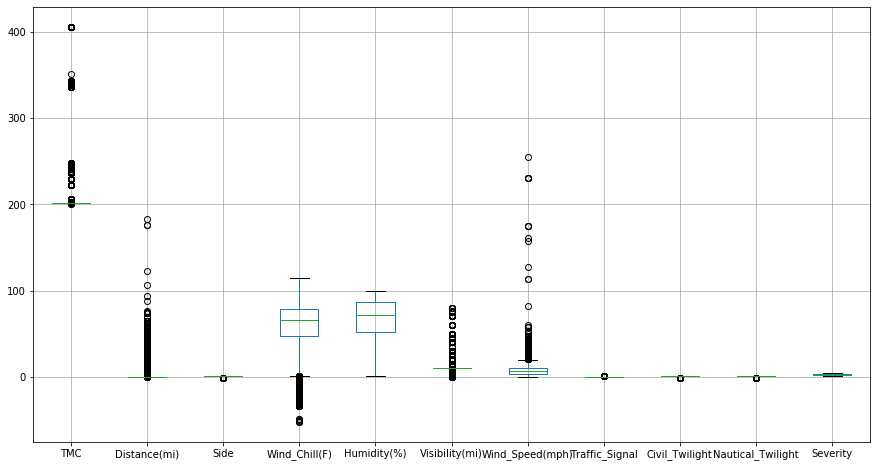

In [23]:
# look at boxplot to see if we need to scale the data
boxplot = sXs.boxplot(figsize=(15,8))

In [145]:
sXs["Severity"].value_counts()

2    386527
3    171230
4      3244
1       173
Name: Severity, dtype: int64

In [37]:
sXs.columns

Index(['TMC', 'Distance(mi)', 'Side', 'Wind_Chill(F)', 'Humidity(%)',
       'Visibility(mi)', 'Wind_Speed(mph)', 'Traffic_Signal', 'Civil_Twilight',
       'Nautical_Twilight', 'Severity'],
      dtype='object')

In [42]:
max_min = sXs['Wind_Speed(mph)'].value_counts().index
print(max(max_min),min(max_min))

255.0 0.0


## separate data

In [53]:
from sklearn.model_selection import train_test_split

# split data into train and test data
X_train, X_test, y_train, y_test = train_test_split(sXs.drop(columns=['Severity']), sXs['Severity'], test_size=0.3)

from sklearn import preprocessing

X_scaled  = preprocessing.scale(sXs.drop(columns=['Severity']))

# split scaled data into train and test data
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_scaled, sXs['Severity'], test_size=0.3)

## redo Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression as lg
# fit the model
lg_ = lg()
lg_.fit(X_train, y_train)

# fit the model with scaled data
lg_scaled = lg()
lg_scaled.fit(X_train_s, y_train_s)

d:\software\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
d:\software\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
d:\software\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
d:\software\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [26]:
print(lg_.classes_)
# accuracy of the model
accuracy = lg_.score(X_test, y_test)
print('accuracy: ', format(accuracy,".2%"))
# Look at the weights
classes = ['Severity 1','Severity 2','Severity 3','Severity 4']
weights = pd.DataFrame(lg_.coef_,columns = X_train.columns.values, index = classes)

# max(abs(coefficients)) of each variables for every class
find_max(weights)

[1 2 3 4]
accuracy:  72.35%


,Severity 1,Severity 2,Severity 3,Severity 4
variable,Distance(mi),Traffic_Signal,Traffic_Signal,Traffic_Signal
cof,0.556464,2.07177,2.08906,1.65877


In [27]:
lg_.predict(X_test)

array([2, 2, 2, ..., 2, 2, 2], dtype=int64)

In [28]:
# accuracy of the model with scaled data
accuracy_scaled = lg_scaled.score(X_test_s, y_test_s) 
ag = compare(accuracy_scaled,accuracy)
print('scalsed data model accuracy: ', format(accuracy_scaled,".2%"),ag, 'non scaled model:',format(accuracy,".2%"))
# Look at the weights
weights = pd.DataFrame(lg_scaled.coef_,columns = X_train.columns.values, index = ['Severity 1','Severity 2','Severity 3','class 4'])
find_max(weights)

scalsed data model accuracy:  72.23% < non scaled model: 72.35%


,Severity 1,Severity 2,Severity 3,Severity 4
variable,Distance(mi),Side,Side,Side
cof,0.493713,0.870378,0.86673,0.756953


In [29]:
import joblib
# Save
# joblib.dump(lg_, 'save/lg_.pkl')
# joblib.dump(lg_scaled, 'save/lg_scaled.pkl')
# reload
# lg_ = joblib.load('save/lg_.pkl')
# lg_scaled = joblib.load('save/lg_scaled.pkl')

['save/lg_scaled.pkl']

## Implement Random Forest

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

rf = RandomForestClassifier(max_depth=3, random_state=0)
rf.fit(X_train, y_train)

rf_scaled = RandomForestClassifier(max_depth=3, random_state=0)
rf_scaled.fit(X_train_s, y_train_s)

d:\software\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
d:\software\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=3, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [31]:
# accuracy of the model
accuracy = rf.score(X_test, y_test)
print('class labels known to the classifier: ',rf.classes_,'\n','accuracy: ', format(accuracy,".2%"))

class labels known to the classifier:  [1 2 3 4] 
 accuracy:  69.95%


In [32]:
#  compare the models
accuracy_rf_scaled = rf_scaled.score(X_test_s, y_test_s) 
ag = compare(accuracy_rf_scaled,accuracy)
print('class labels known to the classifier: ',rf_scaled.classes_,'\n','scaled accuracy: ',
      format(accuracy_rf_scaled,".2%"),ag,'non scaled model:',format(accuracy,".2%"))

class labels known to the classifier:  [1 2 3 4] 
 scaled accuracy:  70.03% > non scaled model: 69.95%


In [33]:
# importance each feature for the model
feature_imopt = pd.DataFrame(rf.feature_importances_,index = X_train.columns.values, columns = ['importance'])
feature_imopt.sort_values(by='importance',ascending = False).T

,Traffic_Signal,Side,Distance(mi),TMC,Wind_Chill(F),Wind_Speed(mph),Nautical_Twilight,Visibility(mi),Civil_Twilight,Humidity(%)
importance,0.510636,0.299943,0.121616,0.042148,0.011921,0.010759,0.001731,0.000889,0.000339,0.000019


In [34]:
# importance each feature for the model with scaled data
feature_imopt = pd.DataFrame(rf_scaled.feature_importances_,index = X_train.columns.values, columns = ['importance'])
feature_imopt.sort_values(by='importance',ascending = False).T

,Traffic_Signal,Side,Distance(mi),TMC,Wind_Speed(mph),Wind_Chill(F),Nautical_Twilight,Visibility(mi),Humidity(%),Civil_Twilight
importance,0.504014,0.304384,0.123915,0.041796,0.011429,0.011279,0.001516,0.001008,0.000428,0.000233


In [35]:
import joblib
# Save
# joblib.dump(rf, 'save/rf.pkl')
# joblib.dump(rf_scaled, 'save/rf_scaled.pkl')
# reload
# rf = joblib.load('save/rf.pkl')
# rf_scaled = joblib.load('save/rf_scaled.pkl')

['save/rf_scaled.pkl']

## Implement Naive Bayes Classifier

In [36]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
# fit the model
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# fit the model with scaled data
gnb_scaled = GaussianNB()
gnb_scaled.fit(X_train_s, y_train_s)

GaussianNB(priors=None, var_smoothing=1e-09)

In [37]:
# accuracy of the model
accuracy = gnb.score(X_test, y_test)
print('class labels known to the classifier: ',gnb.classes_,'\n','accuracy: ', format(accuracy,".2%"))

# variance of each feature per class
sigma_ = pd.DataFrame(gnb.sigma_,columns = X_train.columns.values, index = classes)
find_max(sigma_)

class labels known to the classifier:  [1 2 3 4] 
 accuracy:  70.00%


,Severity 1,Severity 2,Severity 3,Severity 4
variable,Wind_Chill(F),Humidity(%),TMC,TMC
cof,525.403,476.59,990.206,2189.24


In [38]:
#  compare the models
accuracy_gnb_scaled = gnb_scaled.score(X_test_s, y_test_s) 
ag = compare(accuracy_gnb_scaled,accuracy)
print('class labels known to the classifier: ',gnb_scaled.classes_,'\n','accuracy: ',
      format(accuracy_gnb_scaled,".2%"),ag,'non scaled model:',format(accuracy,".2%"))

# variance of each feature per class
sigma_ = pd.DataFrame(gnb_scaled.sigma_,columns = X_train.columns.values, index = classes)
find_max(sigma_)

class labels known to the classifier:  [1 2 3 4] 
 accuracy:  69.86% < non scaled model: 70.00%


,Severity 1,Severity 2,Severity 3,Severity 4
variable,Side,Traffic_Signal,Distance(mi),Distance(mi)
cof,1.4321,1.24152,2.06764,10.1353


In [39]:
TMC_count = X_train["TMC"].value_counts().copy()
TMC_count = pd.DataFrame(TMC_count)
TMC_count.columns = ['Counts']
TMC_count.T

,201.0,241.0,245.0,244.0,203.0,343.0,406.0,246.0,229.0,222.0,...,247.0,206.0,236.0,339.0,341.0,248.0,336.0,200.0,239.0,351.0
Counts,323767,49184,6372,2145,2139,2048,1984,1179,1090,971,...,404,207,196,182,136,54,12,2,1,1


In [40]:
import joblib
# Save
# joblib.dump(gnb, 'save/gnb.pkl')
# joblib.dump(gnb_scaled, 'save/gnb_scaled.pkl')
# reload
# gnb = joblib.load('save/gnb.pkl')
# gnb_scaled = joblib.load('save/gnb_scaled.pkl')

['save/gnb_scaled.pkl']

## Implement Neural Networks

In [41]:
from sklearn.neural_network import MLPClassifier
# craete Neural Network with 2 hidden layer and 5 neuron for each layer
NN = MLPClassifier(solver='lbfgs', alpha= 0.1, 
                    hidden_layer_sizes=(5, 2), random_state=1)

NN.fit(X_train, y_train)

# craete Neural Network with 2 hidden layer and 5 neuron for each layer
NN_scale = MLPClassifier(solver='lbfgs', alpha= 0.1, 
                    hidden_layer_sizes=(5, 2), random_state=1)

NN_scale.fit(X_train_s, y_train_s)

MLPClassifier(activation='relu', alpha=0.1, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(5, 2), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [42]:
# accuracy of the model
accuracy = NN.score(X_test, y_test) 
print('accuracy: ', format(accuracy,"0.2%"))

accuracy:  68.70%


In [43]:
# accuracy of the model
accuracy_NN_scale = NN.score(X_test_s, y_test_s)
ag = compare(accuracy_NN_scale,accuracy)
print('accuracy: ', format(accuracy_NN_scale,".2%"),ag,'non scaled model:',format(accuracy,".2%") )

accuracy:  68.66% < non scaled model: 68.70%


In [44]:
import joblib
# Save
# joblib.dump(NN, 'save/NN.pkl')
# joblib.dump(NN_scale, 'save/NN_scale.pkl')
# reload
# NN = joblib.load('save/NN.pkl')

['save/NN_scale.pkl']

## Decision Trees

In [160]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from IPython.display import Image  
from sklearn import tree
import pydotplus

# fit model
dt = tree.DecisionTreeClassifier(max_depth = 6,min_samples_split = 50)
dt.fit(X_train, y_train)

# fit model with scaled data
dt_scaled = tree.DecisionTreeClassifier(max_depth = 6,min_samples_split = 50)
dt_scaled.fit(X_train_s, y_train_s)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [161]:
# accuracy of the model
accuracy = dt.score(X_test, y_test)
print('accuracy: ', format(accuracy,'.2%'))
# importance each feature for the model with scaled data
feature_imopt = pd.DataFrame(dt.feature_importances_,index = X_train.columns.values, columns = ['importance'])
feature_imopt.sort_values(by='importance',ascending = False).T

accuracy:  73.07%


,Side,Traffic_Signal,TMC,Distance(mi),Wind_Speed(mph),Visibility(mi),Humidity(%),Wind_Chill(F),Nautical_Twilight,Civil_Twilight
importance,0.38034,0.341766,0.162506,0.095082,0.010451,0.005271,0.002895,0.001641,0.000047,0.0


In [162]:
# accuracy of the model with scaled data
accuracy_dt_scaled = dt_scaled.score(X_test_s, y_test_s)
ag = compare(accuracy_dt_scaled,accuracy)
print('model with scaled data accuracy: ', format(accuracy_dt_scaled,".2%"),ag,'non scaled model:',format(accuracy,".2%") )
# importance each feature for the model with scaled data
feature_imopt = pd.DataFrame(dt_scaled.feature_importances_,index = X_train.columns.values, columns = ['importance'])
feature_imopt.sort_values(by='importance',ascending = False).T

model with scaled data accuracy:  72.92% < non scaled model: 73.07%


,Side,Traffic_Signal,TMC,Distance(mi),Wind_Speed(mph),Visibility(mi),Wind_Chill(F),Humidity(%),Civil_Twilight,Nautical_Twilight
importance,0.381389,0.341082,0.164494,0.09277,0.009347,0.00567,0.002721,0.002104,0.000354,0.000068


In [149]:
import joblib
# Save
# joblib.dump(dt, 'save/dt.pkl')
# joblib.dump(dt_scaled, 'save/dt_scaled.pkl')
# reload
# dt = joblib.load('save/dt.pkl')
# dt_scaled = joblib.load('save/dt_scaled.pkl')

['save/dt_scaled.pkl']

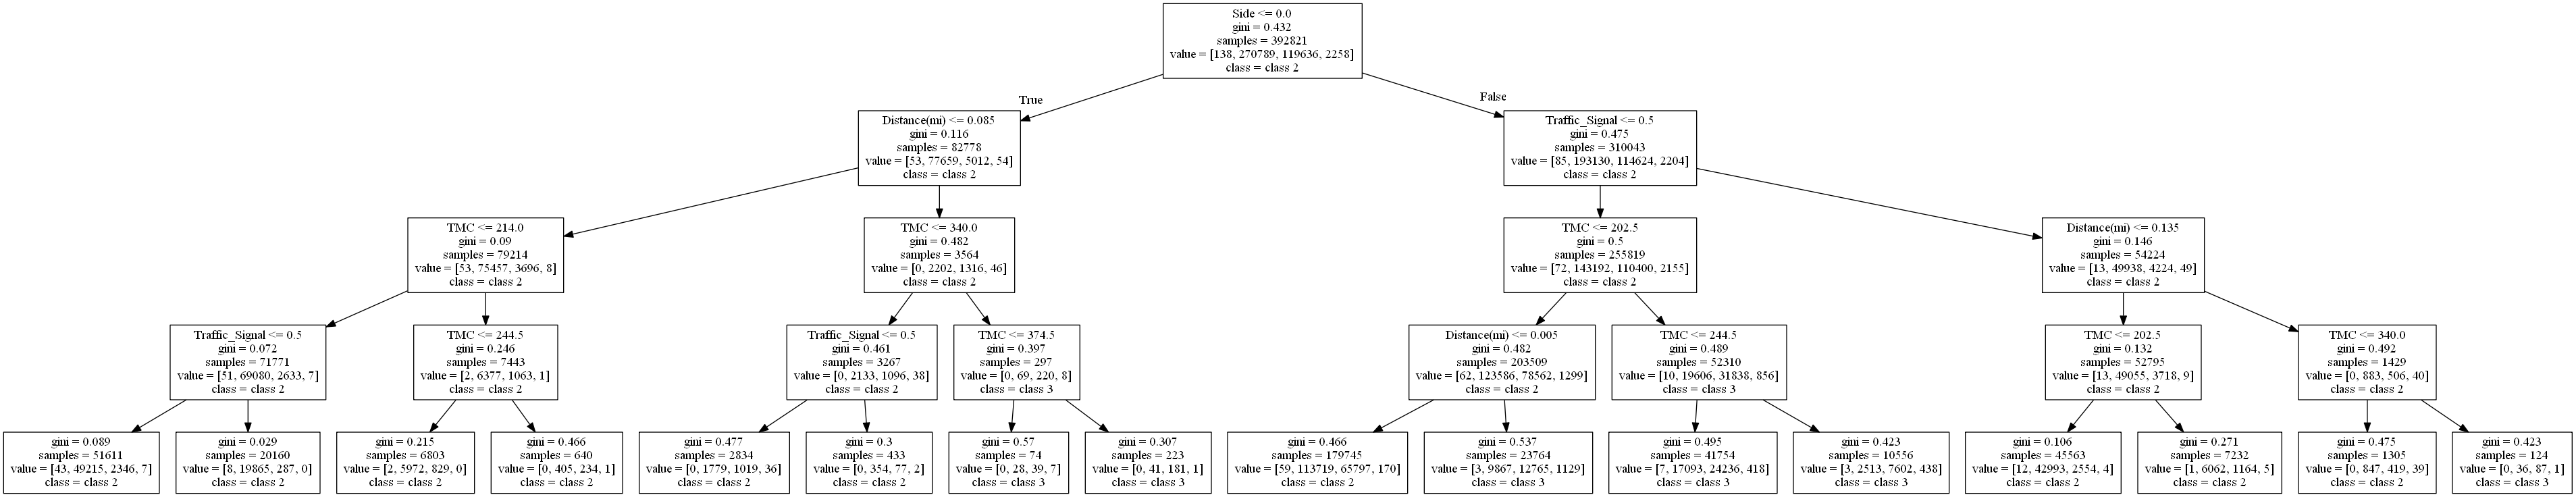

In [69]:
# Create DOT data
dot_data = tree.export_graphviz(dt, out_file=None, 
                                feature_names=selected_features,  
                                class_names=['class 1','class 2','class 3','class 4']
                               )

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data) 
# save graph as PNG
graph.write_png("images/dt.png")
# Show graph
Image(graph.create_png())

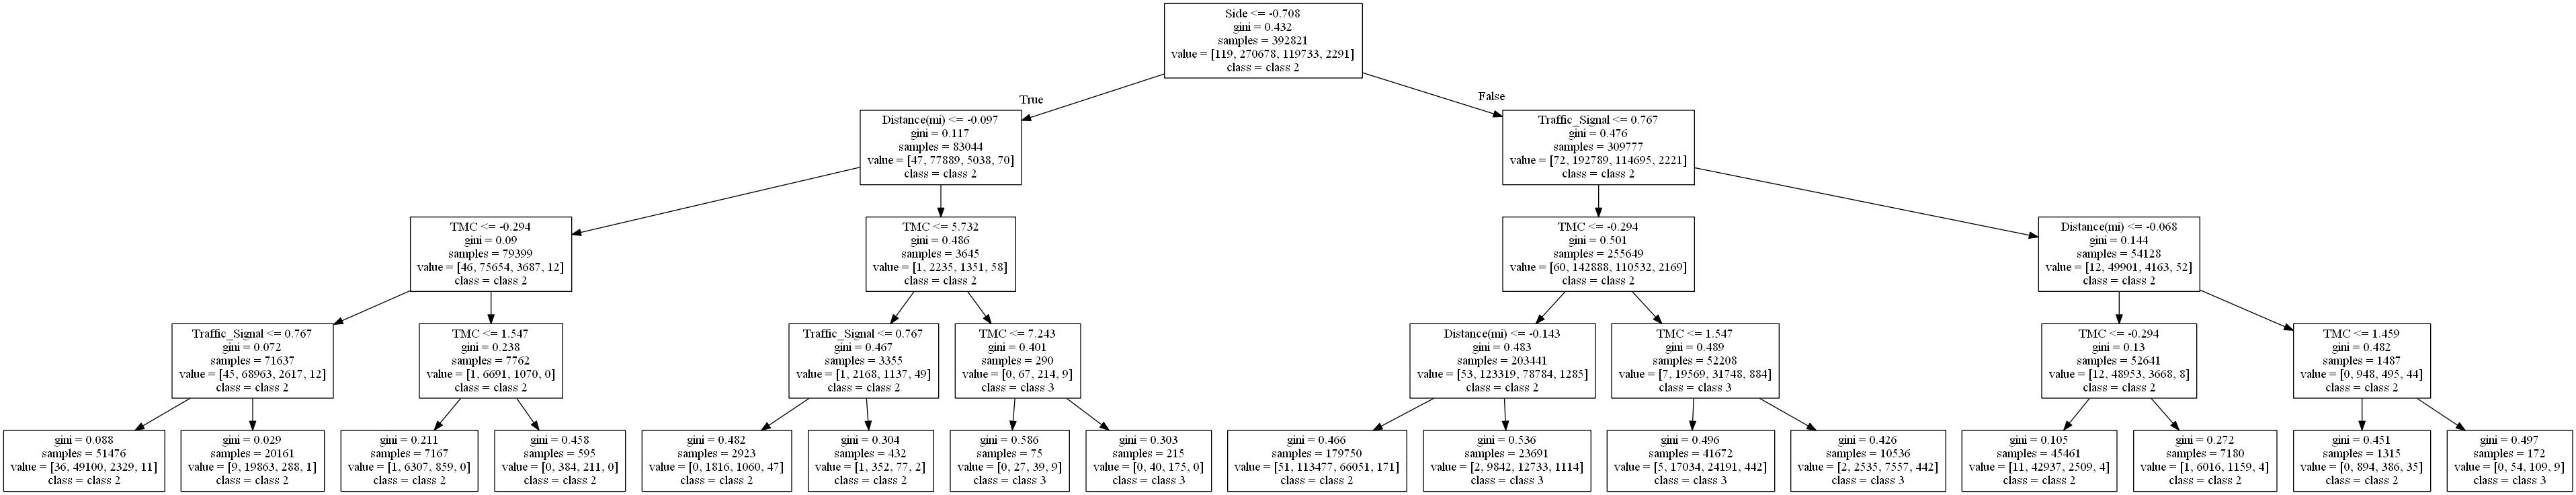

In [70]:
# Create DOT data
dot_data = tree.export_graphviz(dt_scaled, out_file=None, 
                                feature_names=selected_features,  
                                class_names=['class 1','class 2','class 3','class 4']
                               )

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data) 
# save graph as PNG
graph.write_png("images/dt_scaled.png")
# Show graph
Image(graph.create_png())